#x-ray database

href="https://drive.google.com/u/0/uc?id=1c0QYUUwwgdbc1KNeMaQcojEQe7Rw25xJ&export=download">
         <img alt="Qries" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Google_Drive_icon_%282020%29.svg/1024px-Google_Drive_icon_%282020%29.svg.png"
         width=70" height="70">
     
   



In [ ]:
!pip install --upgrade --no-cache-dir gdown
import gdown
url = "https://drive.google.com/u/0/uc?id=17dh2vGpFRV_8Sp4dOrFfnHqr0QXzzu0w&export=download"

d//
output = "/content/sample_data/chest_xray.zip"
gdown.download(url, output, quiet=True)


In [ ]:
!pip install unrar
!unzip "/content/sample_data/chest_xray.zip" -d "/content/sample_data"

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

image_size = (256, 256)
batch_size = 32


train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/sample_data/chest_xray/treinamento',
    labels='inferred',
    label_mode='categorical',
    seed=1992,
    batch_size= batch_size,
    image_size= image_size)

val_ds = keras.utils.image_dataset_from_directory(
    directory='/content/sample_data/chest_xray/validacao',
    labels='inferred',
    label_mode='categorical',
    seed=1992,
    batch_size= batch_size,
    image_size= image_size)

Found 5065 files belonging to 3 classes.
Found 166 files belonging to 3 classes.


In [ ]:
# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


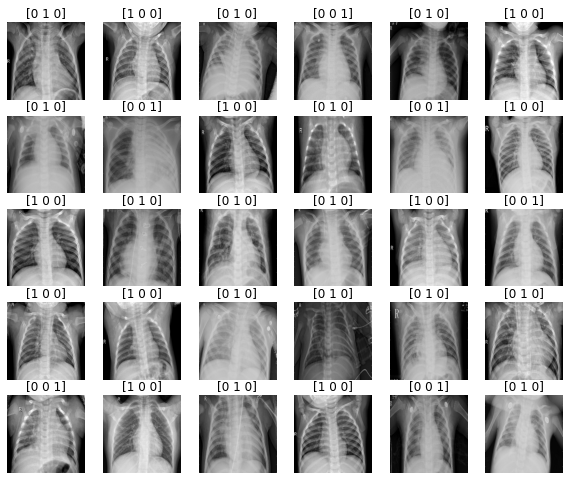

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(30):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

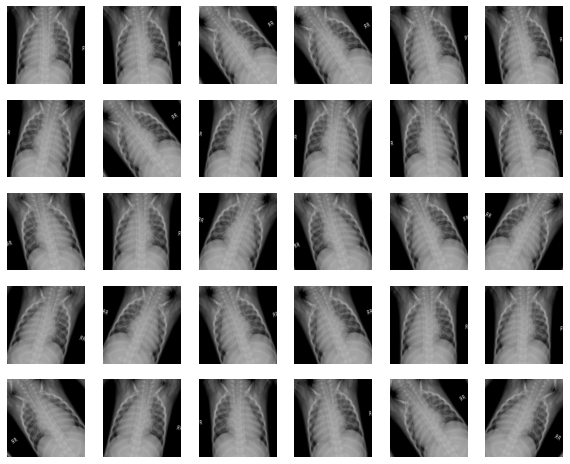

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(30):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

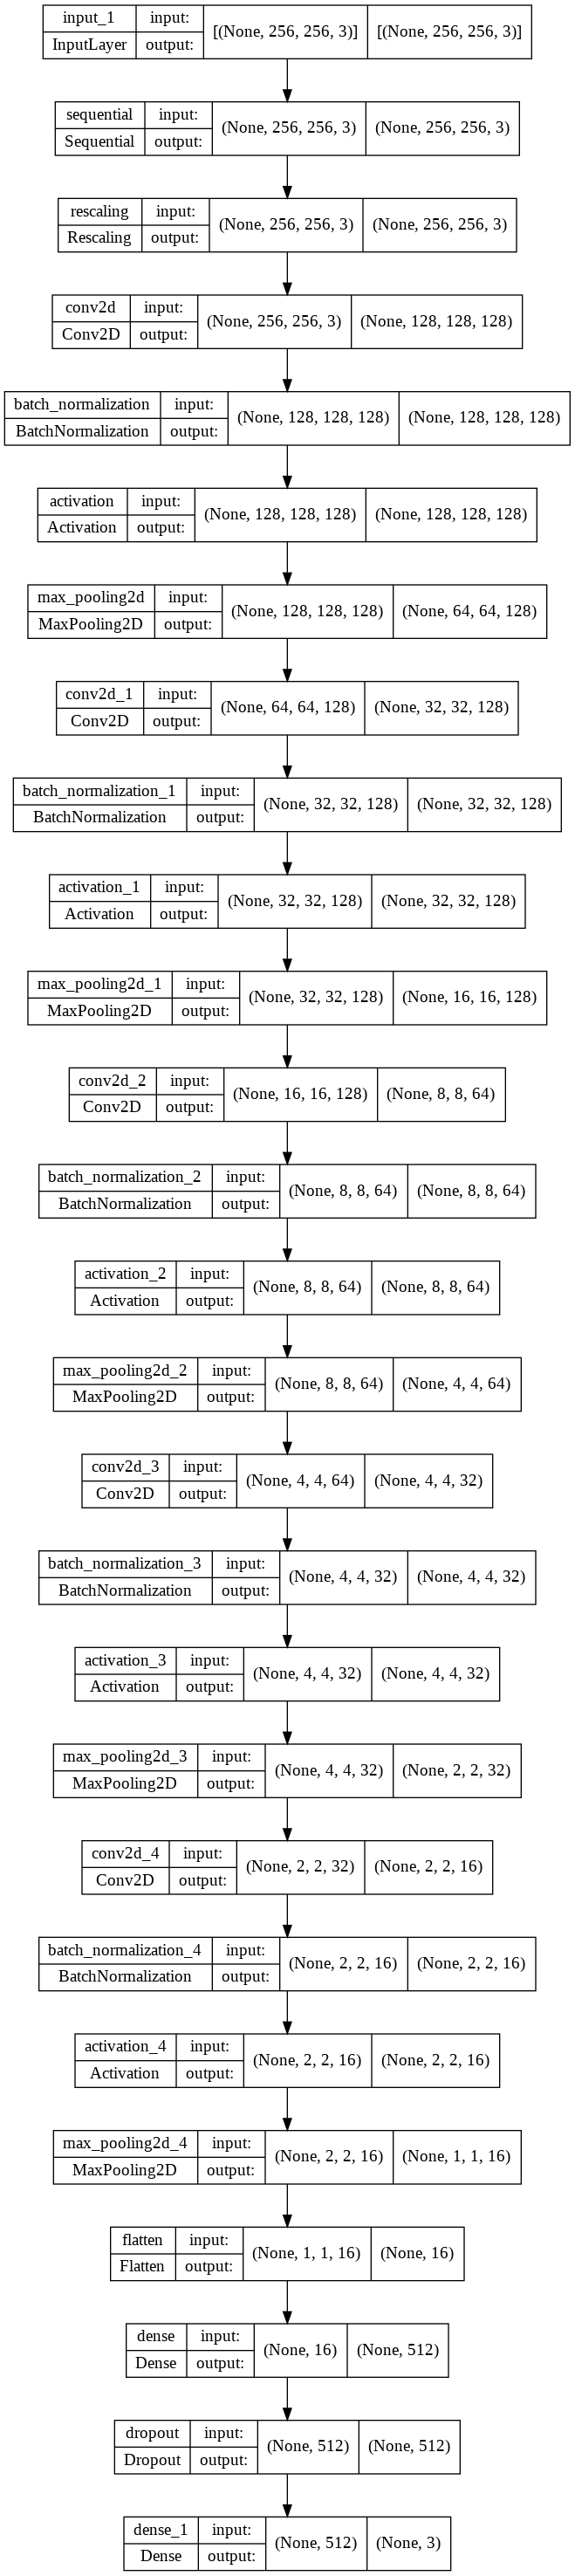

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
      # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    x = layers.Conv2D(32, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    x = layers.Conv2D(16, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    x = layers.Flatten()(x)

    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
 
    outputs = layers.Dense(3, activation='softmax')(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=3)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

model.compile(
     loss='categorical_crossentropy',
     optimizer=RMSprop(lr=0.001),
     metrics=["acc"],
)

history = model.fit_generator(
      train_ds,
      steps_per_epoch=8,  
      epochs= epochs,
      verbose=1,
      validation_data = val_ds,
      validation_steps=8)

model.save('model.h5')


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


8/8 [==============================] - 38s 4s/step - loss: 0.9542 - acc: 0.5625 - val_loss: 1.0676 - val_acc: 0.4940
Epoch 2/20
8/8 [==============================] - 24s 3s/step - loss: 0.8632 - acc: 0.6172
Epoch 3/20
8/8 [==============================] - 23s 3s/step - loss: 0.8355 - acc: 0.6055
Epoch 4/20
8/8 [==============================] - 23s 3s/step - loss: 0.7851 - acc: 0.6328
Epoch 5/20
8/8 [==============================] - 23s 3s/step - loss: 0.7017 - acc: 0.6836
Epoch 6/20
8/8 [==============================] - 23s 3s/step - loss: 0.6764 - acc: 0.6875
Epoch 7/20
8/8 [==============================] - 24s 3s/step - loss: 0.7612 - acc: 0.6719
Epoch 8/20
8/8 [==============================] - 23s 3s/step - loss: 0.7263 - acc: 0.6289
Epoch 9/20
8/8 [==============================] - 23s 3s/step - loss: 0.7108 - acc: 0.6914
Epoch 10/20
8/8 [==============================] - 23s 3s/step - loss: 0.6028 - acc: 0.7500
Epoch 11/20
8/8 [==============================] - 23s 3s/step 

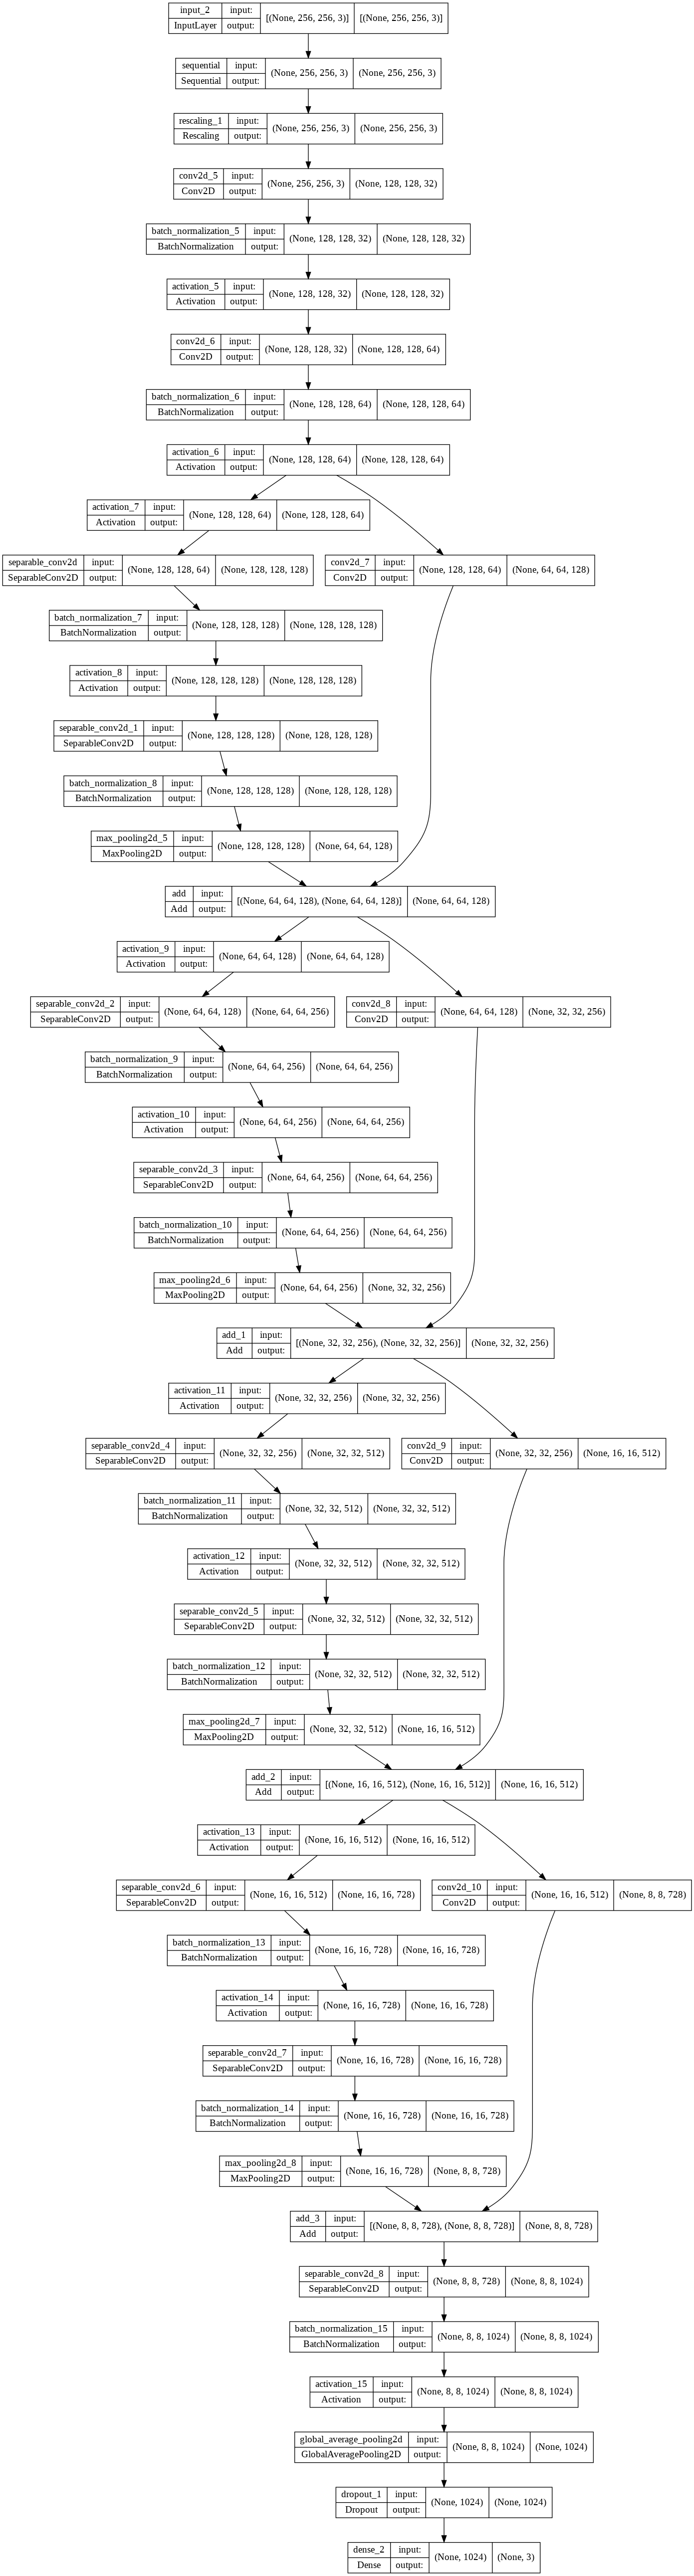

In [ ]:
def make_model2(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
      # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    activation = "softmax"
    units = 3

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model2 = make_model2(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model2, show_shapes=True)


In [ ]:
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

model2.compile(
     loss='categorical_crossentropy',
     optimizer=RMSprop(lr=0.001),
     metrics=["acc"],
)

history = model2.fit_generator(
      train_ds,
      steps_per_epoch=8,  
      epochs= epochs,
      verbose=1,
      validation_data = val_ds,
      validation_steps=8)

model2.save('model.h5')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


8/8 [==============================] - 156s 18s/step - loss: 1.3950 - acc: 0.4609 - val_loss: 1.1147 - val_acc: 0.2952
Epoch 2/100
8/8 [==============================] - 123s 15s/step - loss: 0.9532 - acc: 0.5469
Epoch 3/100
8/8 [==============================] - 122s 15s/step - loss: 0.8886 - acc: 0.5859
Epoch 4/100
8/8 [==============================] - 122s 15s/step - loss: 0.9260 - acc: 0.5625
Epoch 5/100
8/8 [==============================] - 126s 16s/step - loss: 0.9066 - acc: 0.6328
Epoch 6/100
8/8 [==============================] - 123s 15s/step - loss: 0.8292 - acc: 0.5977
Epoch 7/100
8/8 [==============================] - 125s 16s/step - loss: 0.9121 - acc: 0.6055
Epoch 8/100
8/8 [==============================] - 125s 16s/step - loss: 0.7615 - acc: 0.6445
Epoch 9/100
8/8 [==============================] - 125s 16s/step - loss: 0.7378 - acc: 0.6719
Epoch 10/100
8/8 [==============================] - 131s 16s/step - loss: 0.7624 - acc: 0.6758
Epoch 11/100
8/8 [================

In [ ]:
while True:pass

KeyboardInterrupt: ignored